# SC5002 Lab Group 5
1) Ho Min Han
2) MANOHAR RAJA AGATHIYAN
3) Ng Jun Hao Kevin


PLEASE ACTIVATE ENVIRONMENT WITH 

`.\venv\Scripts\activate`

## Import Dataset

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Define column names from the dataset documentation
column_names = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", 
    "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", 
    "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", 
    "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", 
    "city_mpg", "highway_mpg", "price"
]

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, names=column_names, na_values="?")  # "?" represents missing values

# Display first few rows
df.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Check for  Data


In [138]:
print(df.isnull().sum())  # Prints number of missing data


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


## Imputation

In [139]:
# Imputate using median (numerical)
df["normalized_losses"].fillna(df["normalized_losses"].median(), inplace=True)
df["bore"].fillna(df["bore"].median(), inplace=True)
df["stroke"].fillna(df["stroke"].median(), inplace=True)
df["horsepower"].fillna(df["horsepower"].median(), inplace=True)
df["peak_rpm"].fillna(df["peak_rpm"].median(), inplace=True)
df["price"].fillna(df["price"].median(), inplace=True)  # Target variable

# Imputate using mode (categorical)
df["num_doors"].fillna(df["num_doors"].mode()[0], inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_4468\4108746464.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized_losses"].fillna(df["normalized_losses"].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_4468\4108746464.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

## Verify that there is no more missing data

In [140]:

print(df.isnull().sum())


symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


## Encoding categorical data

In [141]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [142]:
from sklearn.preprocessing import LabelEncoder
# One Hot encoding for nominal data (discrete)
df = pd.get_dummies(df, columns=["fuel_type", "aspiration", "body_style", "drive_wheels", 
                                 "engine_location", "engine_type", "fuel_system"], drop_first=True)

# Label Encoding for ordinal data (nominal)
encoder = LabelEncoder()
df["num_cylinders"] = encoder.fit_transform(df["num_cylinders"])
df["num_doors"] = encoder.fit_transform(df["num_doors"])


## Split into training/testing data

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target
X = df.drop(columns=["price", "make"])  # Features
y = df["price"]  # Target variable

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train Data: {X_train.shape}{y_train.shape}")
print(f"Test Data: {X_test.shape}{y_test.shape}")




Train Data: (164, 39)(164,)
Test Data: (41, 39)(41,)


## Import Linear Regression Model

In [144]:
# Fitting the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [145]:
from sklearn.linear_model import Ridge

# Fitting the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)


Ridge()

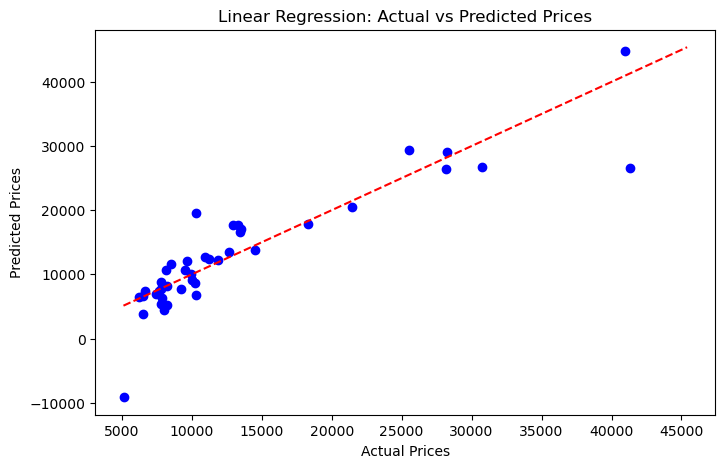

In [146]:
# Predictions and performance metrics for Linear Regression
y_pred_linreg = linear_model.predict(X_test)

# Plot actual vs predicted prices for Linear Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_linreg, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()


Linear Regression CV Scores: [0.76820046 0.85416025 0.85517138 0.503765   0.82308993]
Linear Regression Mean Score: 0.7608774046690253
Ridge Regression (alpha=0.1) CV Scores: [0.75938896 0.85683391 0.85498066 0.50581896 0.81150494]
Ridge Regression (alpha=0.1) Mean Score: 0.7577054887949857
Ridge Regression (alpha=1.0) CV Scores: [0.71638058 0.86646207 0.85117561 0.45501365 0.70727443]
Ridge Regression (alpha=1.0) Mean Score: 0.7192612675007097
Ridge Regression (alpha=10.0) CV Scores: [0.78148734 0.87245694 0.80519393 0.3547812  0.67321837]
Ridge Regression (alpha=10.0) Mean Score: 0.6974275571585811
Ridge Regression (alpha=100.0) CV Scores: [0.82755507 0.85405817 0.75733657 0.36787185 0.7056432 ]
Ridge Regression (alpha=100.0) Mean Score: 0.7024929715995194


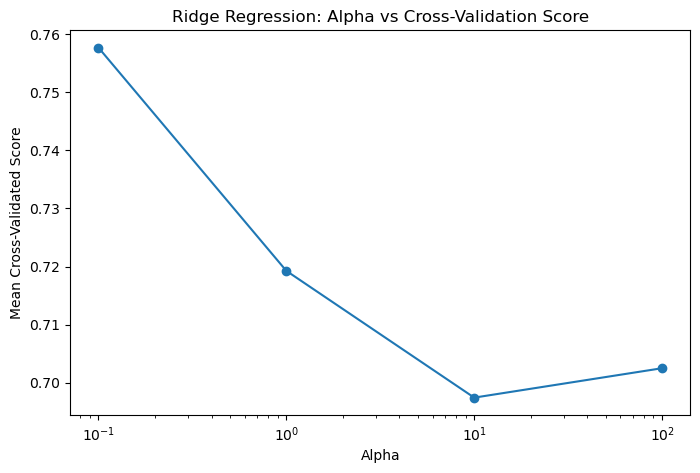

In [147]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
# KFold Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
linear_reg = LinearRegression()
alphas = [0.1, 1.0, 10.0, 100.0]  # Different values of alpha for Ridge regression
ridge_mse = []

# Train and evaluate the Linear Regression model using K-Fold Cross-Validation
linear_scores = cross_val_score(linear_reg, X_train, y_train, cv=kf)
print(f"Linear Regression CV Scores: {linear_scores}")
print(f"Linear Regression Mean Score: {np.mean(linear_scores)}")

# Train and evaluate Ridge Regression models for different alphas
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge_scores = cross_val_score(ridge, X_train, y_train, cv=kf)
    ridge_mse.append(np.mean(ridge_scores))  # You can store or print the raw scores as well
    print(f"Ridge Regression (alpha={alpha}) CV Scores: {ridge_scores}")
    print(f"Ridge Regression (alpha={alpha}) Mean Score: {np.mean(ridge_scores)}")

# You can further plot the results of Ridge Regression alpha tuning
plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge_mse, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Cross-Validated Score')
plt.title('Ridge Regression: Alpha vs Cross-Validation Score')
plt.show()

# Calculate MSE and R² Score:

 

In [148]:
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
linear_reg.fit(X_train, y_train)
linear_preds = linear_reg.predict(X_test)

# Train Ridge Regression model (with chosen alpha, e.g., 1.0)
ridge = Ridge(alpha=1.0)  # You can change the alpha value
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

# Calculate Mean Squared Error and R² score for Linear Regression
linear_mse = mean_squared_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)

# Calculate Mean Squared Error and R² score for Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

# Print the results
print(f"Linear Regression MSE: {linear_mse}, R²: {linear_r2}")
print(f"Ridge Regression MSE: {ridge_mse}, R²: {ridge_r2}")

Linear Regression MSE: 17254834.07927899, R²: 0.7800346276170997
Ridge Regression MSE: 14863542.094664212, R²: 0.8105189214361692


# Check for Overfitting in Linear Regression:

Evaluate both models on both the training and test data.
Large discrepancies between training and test errors in Linear Regression indicate overfitting, 
while Ridge Regression should show more consistent performance.
Examine the coefficients of both models. Ridge regression should yield smaller coefficients, indicating reduced model complexity.

In [149]:
# Train Linear Regression model
linear_reg.fit(X_train, y_train)
linear_train_preds = linear_reg.predict(X_train)
linear_test_preds = linear_reg.predict(X_test)

# Train Ridge Regression model (with chosen alpha)
ridge = Ridge(alpha=1.0)  # You can change the alpha value
ridge.fit(X_train, y_train)
ridge_train_preds = ridge.predict(X_train)
ridge_test_preds = ridge.predict(X_test)

# Calculate MSE and R² for both models on training and test data
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Performance
linear_train_mse = mean_squared_error(y_train, linear_train_preds)
linear_test_mse = mean_squared_error(y_test, linear_test_preds)
linear_train_r2 = r2_score(y_train, linear_train_preds)
linear_test_r2 = r2_score(y_test, linear_test_preds)

# Ridge Regression Performance
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
ridge_train_r2 = r2_score(y_train, ridge_train_preds)
ridge_test_r2 = r2_score(y_test, ridge_test_preds)

# Print the results for analysis
print(f"Linear Regression - Training MSE: {linear_train_mse}, Test MSE: {linear_test_mse}")
print(f"Linear Regression - Training R²: {linear_train_r2}, Test R²: {linear_test_r2}")

print(f"Ridge Regression - Training MSE: {ridge_train_mse}, Test MSE: {ridge_test_mse}")
print(f"Ridge Regression - Training R²: {ridge_train_r2}, Test R²: {ridge_test_r2}")

# Coefficients comparison
print("\nLinear Regression Coefficients:", linear_reg.coef_)
print("Ridge Regression Coefficients:", ridge.coef_)

Linear Regression - Training MSE: 3364304.3168772864, Test MSE: 17254834.07927899
Linear Regression - Training R²: 0.9415921103153962, Test R²: 0.7800346276170997
Ridge Regression - Training MSE: 4501173.423549354, Test MSE: 14863542.094664212
Ridge Regression - Training R²: 0.9218548573459711, Test R²: 0.8105189214361692

Linear Regression Coefficients: [ 7.93128887e+01  1.06616810e+01 -4.14917951e+02  1.57658136e+02
 -9.90391614e+01  5.65752944e+02  2.13389970e+02  4.00022892e+00
 -1.51216123e+03  1.36979927e+02 -3.28192427e+03 -3.83120245e+03
 -4.01606040e+02 -4.48325405e+00  1.45604102e+00 -1.51483838e+02
  1.48448059e+02 -2.72199772e+03  1.90312957e+03 -3.91566912e+03
 -2.86935963e+03 -1.87040859e+03 -3.54965145e+03  2.70032170e+02
  1.77868170e+03  1.38300055e+04 -2.05882634e+04 -4.34499101e+03
  1.20746882e+03  3.74977075e+02 -2.96638603e+03  1.52886957e+04
 -2.40833714e+02 -1.16878574e+03  2.72199772e+03 -2.76610251e+03
 -1.07665105e+02 -2.18944287e+03 -6.93812825e+02]
Ridge Re

## Improving Model Performance by Experimenting with different Alpha Values

# Define a range of alpha values to test





In [150]:
alpha_values = np.logspace(-4, 4, 10) # Test values from 10^-4 to 10^4

# Initialize lists to store results

In [151]:
train_mse_list = [] 
test_mse_list = []
train_r2_list = [] 
test_r2_list = []

# Predictions, Calculate MSE and R² for training and test sets & Store results


In [152]:

# Loop through each alpha value and train Ridge Regression
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)  # Train Ridge Regression with current alpha
    
    # Predictions
    ridge_train_preds = ridge.predict(X_train)
    ridge_test_preds = ridge.predict(X_test)
    
    # Calculate MSE and R² for both train and test sets
    train_mse = mean_squared_error(y_train, ridge_train_preds)
    test_mse = mean_squared_error(y_test, ridge_test_preds)
    train_r2 = r2_score(y_train, ridge_train_preds)
    test_r2 = r2_score(y_test, ridge_test_preds)
    
    # Append the results to the corresponding lists
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

# Print the results for each alpha
for i, alpha in enumerate(alpha_values):
    print(f"Alpha: {alpha}, Train MSE: {train_mse_list[i]}, Test MSE: {test_mse_list[i]}")
    print(f"Train R²: {train_r2_list[i]}, Test R²: {test_r2_list[i]}")

Alpha: 0.0001, Train MSE: 3364304.4694040758, Test MSE: 17253336.03724643
Train R²: 0.9415921076673694, Test R²: 0.7800537247218313
Alpha: 0.000774263682681127, Train MSE: 3364313.4090067125, Test MSE: 17243283.562998448
Train R²: 0.9415919524663902, Test R²: 0.7801818740990532
Alpha: 0.005994842503189409, Train MSE: 3364826.501890789, Test MSE: 17168181.01936745
Train R²: 0.9415830446299556, Test R²: 0.7811392845789681
Alpha: 0.046415888336127774, Train MSE: 3387819.4090866577, Test MSE: 16710485.32328633
Train R²: 0.9411838633845826, Test R²: 0.7869740091416015
Alpha: 0.3593813663804626, Train MSE: 3796102.509205983, Test MSE: 15433396.375398267
Train R²: 0.9340956359159117, Test R²: 0.8032543943772747
Alpha: 2.782559402207126, Train MSE: 5652336.047456072, Test MSE: 14604239.252466047
Train R²: 0.9018694537637555, Test R²: 0.8138245253024248
Alpha: 21.54434690031882, Train MSE: 8613313.523356812, Test MSE: 15202902.055153143
Train R²: 0.8504637456346132, Test R²: 0.8061927459575863


In [153]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [154]:
print(len(alpha_values))  # This should match the lengths of train_mse_list and test_mse_list
print(len(train_mse_list))
print(len(test_mse_list))


10
10
10


# Plotting MSE vs Alpha

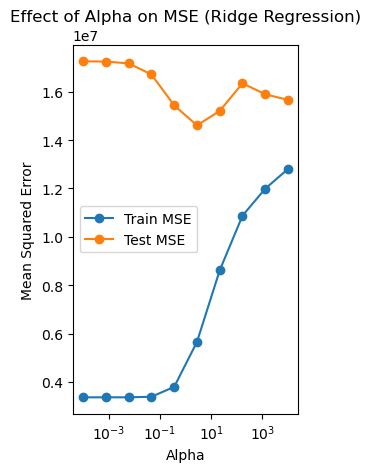

In [155]:
plt.subplot(1, 2, 1)
plt.plot(alpha_values, train_mse_list, label='Train MSE', marker='o')
plt.plot(alpha_values, test_mse_list, label='Test MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Alpha on MSE (Ridge Regression)')
plt.legend()


# Plot R² Score vs Alpha

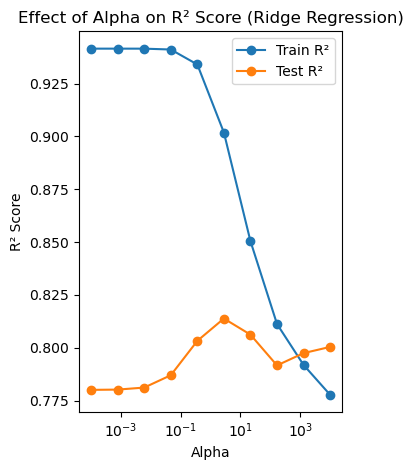

In [156]:
plt.subplot(1, 2, 2)
plt.plot(alpha_values, train_r2_list, label='Train R²', marker='o')
plt.plot(alpha_values, test_r2_list, label='Test R²', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Effect of Alpha on R² Score (Ridge Regression)')
plt.legend()

plt.tight_layout()
plt.show()


# When to use Linear Regression

1. Small to Moderate Number of Features: Linear regression works well when the number of features is relatively small, and there is no strong multicollinearity in the dataset.
   
2. No Overfitting Issues: If the dataset is large and there is little to no risk of overfitting, Linear Regression can provide a good fit without needing regularization.

3. Simplicity and Interpretability: Linear Regression is highly interpretable, as it allows you to directly examine the relationship between the target variable and the features (coefficients). This makes it useful when the goal is to understand how much each feature contributes to the prediction.

Practical Applications:
1. House Price Prediction:
In cases where the number of features (such as square footage, number of rooms, and location) is limited, Linear Regression can be used to predict 
house prices based on past data. It provides interpretable coefficients, which are useful for understanding the influence of each feature.

# When to use Ridge Regression

1. High-Dimensional Data: Ridge Regression is particularly useful when there are a large number of features (i.e., when the dataset has more features than samples) or when multicollinearity exists (when features are correlated).

2. Regularization is Needed to Prevent Overfitting: In cases where the model is prone to overfitting (such as small datasets with many features), Ridge Regression helps by adding a penalty for large coefficients, reducing variance and improving generalization.

3. Better Generalization: Ridge Regression can achieve better performance on unseen test data by controlling the complexity of the model and preventing it from fitting to noise in the training data.

Practical Applications:
1. Predicting Stock Prices (Time Series Analysis):

Stock prices are influenced by many factors (such as market sentiment, economic indicators, and historical data). Since there are many potentially collinear features, Ridge Regression can help by controlling the model’s complexity and preventing overfitting on historical data.

2. Genomic Data (Gene Expression Analysis):

In bioinformatics, researchers often deal with genomic data that has thousands of features (genes) but limited samples. Ridge Regression is useful here to prevent overfitting and to select models that generalize well when making predictions based on gene expression levels.
